In [1]:
import scipy.io as sio
import scipy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import time
from numpy import genfromtxt
from tensorflow.keras import layers
import random

In [65]:
#plotting function
def plot1(x,true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        #ax1 = axesf[i]
        if i < true.shape[1]:
            #ax1.set_ylim([0,1.05])
            ax1.scatter(x, true[:,i],color='black', s= 1)
        else:
            ax1.axis('off')
def plot2(true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        #ax1 = axesf[i]
        if i < true.shape[1]:
            #ax1.set_ylim([0,1.05])
            ax1.plot(true[:,i],color='black')
        else:
            ax1.axis('off')
def plot3(true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < true.shape[1]:
            ax1.set_ylim([0,1.05])
            ax1.plot(true[:,i],color='black')
        else:
            ax1.axis('off')

            
def plotpredictionb(true, train0, predict0, nstep, frequency, nrows,ncols): 
    #print(np.round(np.sqrt(np.mean((true-predict0)**2)),3))
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    plt.ylim(0,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black', marker = 'o',s=1,label='True')
            ax1.scatter(np.arange(0, nstep,frequency),train0[:int(nstep/frequency),i],color='orange',marker = 'o',s = 1,label='Short-term')
            ax1.scatter(np.arange(nstep,nstep+predict0.shape[0]*frequency,frequency),predict0[:,i],color='green',marker = 'o',s =1,label='Long-term')
            #err = np.round(np.sqrt(np.mean((true[:,i]-predict0[:,i])**2)),3)
            ax1.set_ylim([-0.05,1.05])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.legend(loc=0,fontsize = 8)
        else:
            ax1.axis('off')
            

def plotprediction3b0(true, predict0, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0, nstep,frequency),predict0[:int(nstep/frequency),i],
                     color='green',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,predict0.shape[0]*frequency,frequency),
                     predict0[int(nstep/frequency):,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')            

            
def plotprediction3b(true, predict0, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:

            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0,predict0.shape[0]*frequency,frequency),
                     predict0[:,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')
def plotpredictionlong(true, predict0,frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0,predict0.shape[1]*frequency,frequency),
                     predict0[0,:,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')
def normalization(prop):
    
    #prop = block_reduce(prop, block_size = (24,1), func = np.mean)
    #prop = scipy.signal.savgol_filter(prop[:-1], 1001, 2, mode = 'mirror',axis = 0)
    scaler = MinMaxScaler(feature_range=(0, 1))
    return np.reshape(scaler.fit_transform(prop.reshape([-1,1])),[-1, prop.shape[1]])

In [6]:
# Generate Toy datasets
def get_next_val(init, t, tmin, tmax, final = None):
    if final is None:
        return init
    val = init + (final - init) / (tmax - tmin) * t
    return val
def generate_periodic(time_steps, init_freq, init_amplitude, starting_point, 
    final_freq = None, final_amplitude = None, phi_offset = 0.):

    tmin = time_steps.min()
    tmax = time_steps.max()

    data = []
    t_prev = time_steps[0]
    phi = phi_offset
    for t in time_steps:
        dt = t - t_prev
        amp = get_next_val(init_amplitude, t, tmin, tmax, final_amplitude)
        freq = get_next_val(init_freq, t, tmin, tmax, final_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    return np.array(data)

def generate_periodic2(time_steps, init_freq, init_amplitude, starting_point, 
    final_freq = None, final_amplitude = None, phi_offset = 0.):

    tmin = time_steps.min()
    tmax = time_steps.max()

    data = []
    t_prev = time_steps[0]
    phi = phi_offset
    for t in time_steps[:len(time_steps)//2]:
        dt = t - t_prev
        amp = get_next_val(init_amplitude, t, tmin, tmax, final_amplitude)
        freq = get_next_val(init_freq, t, tmin, tmax, final_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    for t in time_steps[len(time_steps)//2:]:
        dt = t - t_prev
        amp = get_next_val(final_amplitude, t, tmin, tmax, init_amplitude)
        freq = get_next_val(final_freq, t, tmin, tmax, init_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    return np.array(data)

In [3]:
def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled
def GenerateSets(x, y, frequency, twindow, twindow2, predictwindow):
    yin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, y.shape[1]))
    xin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, x.shape[1]))
    yout = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, y.shape[1]))
    control = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, x.shape[1]))
    obs = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, y.shape[1]))
    for i in range(x.shape[0] - (twindow + twindow2) * frequency + 1):
        for j in range(twindow):
            yin[i,j] = y[i + j * frequency]
            xin[i,j] = x[i + j * frequency]
        for j in range(twindow2):
            yout[i,j] = y[twindow * frequency + i + j * frequency]
            control[i,j] = x[twindow * frequency + i + j * frequency]
        obs[i] = y[twindow * frequency + i]
    history = np.concatenate((xin,yin), axis = 2)
    n = int(yout.shape[0]/twindow2/frequency)
    traintesthistory = np.zeros((n, twindow, x.shape[1] + y.shape[1]))
    traintestcontrol = np.zeros((n, twindow2, x.shape[1]))
    for i in range(n):
        traintesthistory[i] = history[i*twindow2*frequency]
        traintestcontrol[i] = control[i*twindow2*frequency]
    stepsize = 1
    initialwindow = yout.shape[0] - predictwindow
    

    index = np.random.permutation(initialwindow)
    historyt = (history[:initialwindow])[index]
    controlt = (control[:initialwindow])[index]
    youtt = (yout[:initialwindow])[index]
    return history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin

In [23]:
#Build CNNRNN model without labeling scheme 
def build_model(nneck,lr, twindow, twindow2, nfeature, ncontrol):
    inputA = tf.keras.Input(batch_shape=(None, twindow, (nfeature+ncontrol)), name = 'History')
    inputB = tf.keras.Input(batch_shape=(None, None, ncontrol), name = 'Control')
    inputstate = tf.keras.Input(batch_shape=(None, nfeature), name = 'Initial_State')
    is_training = tf.keras.Input(batch_shape=(None, 1), name = 'Is_Training')
    x1 = layers.Conv1D(8,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(inputA)
    #x1b = layers.Conv1D(2,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(x1)
    #x2 = layers.Conv1D(2,3, strides = 2, padding = 'valid', use_bias=False,activation = 'relu')(x1)
    print(x1.shape)
    x2 = layers.Flatten()(x1)
    x2a1 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b1 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2a2 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b2 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005))(x2)
    z0 = layers.LSTM(nneck, activation = 'relu', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='zeros',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU1')(inputB, initial_state = [x2a1, x2a2])
    
    z = layers.LSTM(nfeature, activation = 'linear', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='identity',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU2')(z0, initial_state = [x2b1, x2b2])
    #print(z.shape)
    initial_learning_rate = lr
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=300,
        decay_rate=0.95,
        staircase=True)
    model = tf.keras.Model(inputs=[inputA, inputB, inputstate, is_training], outputs=[z, z])
    opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=['mse', 'mae'],loss_weights=[1, 0], optimizer=opt,metrics=['accuracy'])
    return model

In [26]:
#Build CNNRNN model without labeling scheme 
def build_model2(nneck,lr, twindow, twindow2, nfeature, ncontrol):
    inputA = tf.keras.Input(batch_shape=(None, twindow, (nfeature+ncontrol)), name = 'History')
    inputB = tf.keras.Input(batch_shape=(None, None, ncontrol), name = 'Control')
    inputstate = tf.keras.Input(batch_shape=(None, nfeature), name = 'Initial_State')
    is_training = tf.keras.Input(batch_shape=(None, 1), name = 'Is_Training')
    label = tf.keras.Input(batch_shape=(None, None, nfeature), name = 'Label')
    x1 = layers.Conv1D(8,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(inputA)
    #x1b = layers.Conv1D(2,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(x1)
    #x2 = layers.Conv1D(2,3, strides = 2, padding = 'valid', use_bias=False,activation = 'relu')(x1)
    print(x1.shape)
    x2 = layers.Flatten()(x1)
    x2a1 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b1 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2a2 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b2 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005))(x2)
    z0 = layers.LSTM(nneck, activation = 'relu', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='zeros',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU1')(inputB, initial_state = [x2a1, x2a2])
    
    z01 = layers.LSTM(nfeature, activation = 'linear', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='identity',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU2')(z0, initial_state = [x2b1, x2b2])
    z = layers.Multiply()([label, z01])
    #print(z.shape)
    initial_learning_rate = lr
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=300,
        decay_rate=0.95,
        staircase=True)
    model = tf.keras.Model(inputs=[inputA, inputB, inputstate, is_training, label], outputs=[z, z0])
    opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=['mse', 'mae'],loss_weights=[1, 0], optimizer=opt,metrics=['accuracy'])
    return model

8


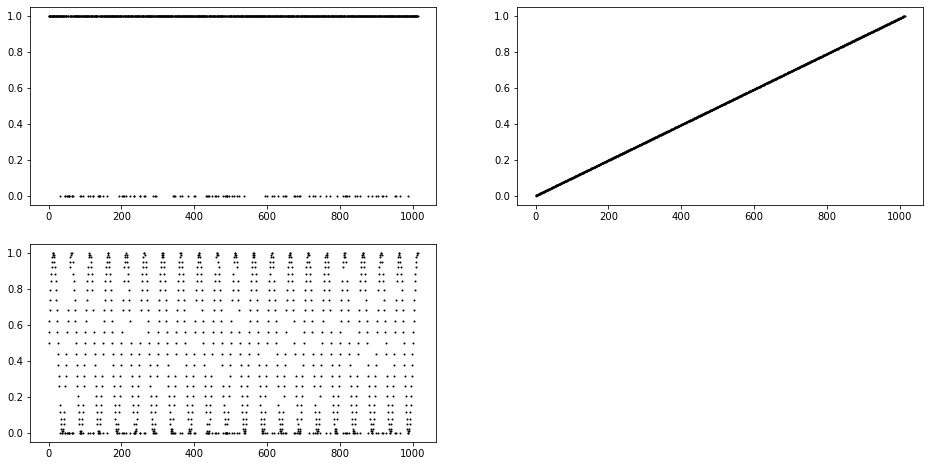

In [58]:
#number of datapoints
totaln = 1014
#training epochs
nepochs = 500
#batch size
nbsize = 50
#data frequency
frequency = 1
#validation set 
validsplit = 0
#lookback period
twindow = 6
#predicting horizon
twindow2 = 48
#test series
predictwindow = 192
#number of feature
nfeature = 1
#number of control
ncontrol = 2
#size of feature vector
nneck = 16
#generate data
x = np.arange(totaln)
y00 = generate_periodic(x, 0.02, 0.5, 0,final_freq =0.02, final_amplitude = 0.5)


y00 = np.expand_dims(y00,axis =1)
y0 = normalization(y00)
#set a random 10% of data to 0 and label them
label = np.random.randint(9, size = (totaln, 1))
print(np.max(label))
label[label < 7.5] = 1
label[label > 7.5] = 0
x = np.concatenate((label,np.expand_dims(x/totaln,axis = 1)),axis = 1)
y = label*y0
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)
obst5a = np.copy(obs)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
obst5 = np.copy(obs)

In [54]:
#training
a = time.time()
model_long = build_model(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.0005)


is_training = True*np.ones(historyt.shape[0])
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training],
            [youtt,youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=0,
            verbose=1,shuffle=True)
model_long.summary()

(None, 4, 8)
Epoch 1/500
16/16 [==============================] - 0s 15ms/step - loss: 0.3716 - GRU2_loss: 0.3677 - GRU2_1_loss: 0.4811 - GRU2_accuracy: 0.1180 - GRU2_1_accuracy: 0.1180
Epoch 2/500
16/16 [==============================] - 0s 13ms/step - loss: 0.3232 - GRU2_loss: 0.3193 - GRU2_1_loss: 0.4357 - GRU2_accuracy: 0.1180 - GRU2_1_accuracy: 0.1180
Epoch 3/500
16/16 [==============================] - 0s 13ms/step - loss: 0.2825 - GRU2_loss: 0.2787 - GRU2_1_loss: 0.4073 - GRU2_accuracy: 0.1180 - GRU2_1_accuracy: 0.1180
Epoch 4/500
16/16 [==============================] - 0s 13ms/step - loss: 0.2381 - GRU2_loss: 0.2343 - GRU2_1_loss: 0.3803 - GRU2_accuracy: 0.1180 - GRU2_1_accuracy: 0.1180
Epoch 5/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1885 - GRU2_loss: 0.1848 - GRU2_1_loss: 0.3572 - GRU2_accuracy: 0.1180 - GRU2_1_accuracy: 0.1180
Epoch 6/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1561 - GRU2_loss: 0.1525 - GRU2_1_loss: 0.3408

16/16 [==============================] - 0s 13ms/step - loss: 0.0125 - GRU2_loss: 0.0090 - GRU2_1_loss: 0.0702 - GRU2_accuracy: 0.1498 - GRU2_1_accuracy: 0.1498
Epoch 95/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0121 - GRU2_loss: 0.0086 - GRU2_1_loss: 0.0680 - GRU2_accuracy: 0.1498 - GRU2_1_accuracy: 0.1498
Epoch 96/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0122 - GRU2_loss: 0.0087 - GRU2_1_loss: 0.0688 - GRU2_accuracy: 0.1498 - GRU2_1_accuracy: 0.1498
Epoch 97/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0117 - GRU2_loss: 0.0083 - GRU2_1_loss: 0.0664 - GRU2_accuracy: 0.1498 - GRU2_1_accuracy: 0.1498
Epoch 98/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0116 - GRU2_loss: 0.0081 - GRU2_1_loss: 0.0658 - GRU2_accuracy: 0.1498 - GRU2_1_accuracy: 0.1498
Epoch 99/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0118 - GRU2_loss: 0.0083 - GRU2_1_loss: 0.0671 - GRU2_accuracy: 0.

16/16 [==============================] - 0s 13ms/step - loss: 0.0079 - GRU2_loss: 0.0045 - GRU2_1_loss: 0.0483 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 187/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0077 - GRU2_loss: 0.0043 - GRU2_1_loss: 0.0469 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 188/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0076 - GRU2_loss: 0.0042 - GRU2_1_loss: 0.0461 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 189/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0079 - GRU2_loss: 0.0045 - GRU2_1_loss: 0.0480 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 190/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0075 - GRU2_loss: 0.0041 - GRU2_1_loss: 0.0454 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 191/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0076 - GRU2_loss: 0.0042 - GRU2_1_loss: 0.0461 - GRU2_accurac

16/16 [==============================] - 0s 14ms/step - loss: 0.0061 - GRU2_loss: 0.0028 - GRU2_1_loss: 0.0369 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 279/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0061 - GRU2_loss: 0.0029 - GRU2_1_loss: 0.0372 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 280/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0061 - GRU2_loss: 0.0028 - GRU2_1_loss: 0.0369 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 281/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0061 - GRU2_loss: 0.0028 - GRU2_1_loss: 0.0370 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 282/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0061 - GRU2_loss: 0.0029 - GRU2_1_loss: 0.0374 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 283/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0064 - GRU2_loss: 0.0031 - GRU2_1_loss: 0.0400 - GRU2_accurac

16/16 [==============================] - 0s 13ms/step - loss: 0.0054 - GRU2_loss: 0.0023 - GRU2_1_loss: 0.0325 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 371/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0054 - GRU2_loss: 0.0023 - GRU2_1_loss: 0.0325 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 372/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0053 - GRU2_loss: 0.0022 - GRU2_1_loss: 0.0321 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 373/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0054 - GRU2_loss: 0.0023 - GRU2_1_loss: 0.0327 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 374/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0054 - GRU2_loss: 0.0023 - GRU2_1_loss: 0.0327 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 375/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0055 - GRU2_loss: 0.0024 - GRU2_1_loss: 0.0338 - GRU2_accurac

16/16 [==============================] - 0s 14ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0300 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 463/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0298 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 464/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0295 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 465/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0294 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 466/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0295 - GRU2_accuracy: 0.1499 - GRU2_1_accuracy: 0.1499
Epoch 467/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0049 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0293 - GRU2_accurac

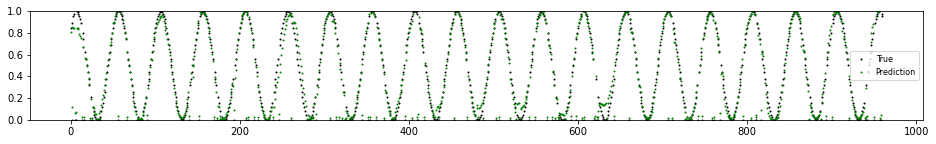

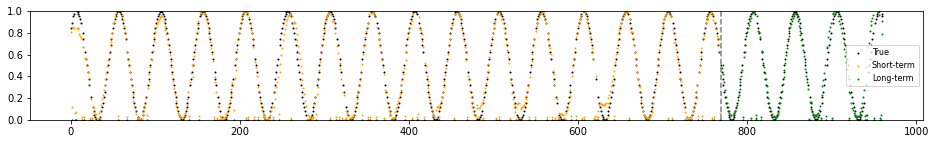

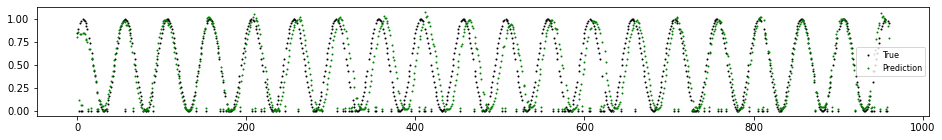

In [55]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [59]:
#training
a = time.time()
model_long = build_model2(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)
is_training = True*np.ones(initialwindow)
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training, controlt[:,:,:nfeature]],
            [youtt, youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=validsplit,
            verbose=1,shuffle=True)

(None, 4, 8)
Epoch 1/500
16/16 [==============================] - 0s 18ms/step - loss: 0.4459 - multiply_5_loss: 0.4421 - GRU1_loss: 0.4280 - multiply_5_accuracy: 0.1111 - GRU1_accuracy: 5.4183e-05
Epoch 2/500
16/16 [==============================] - 0s 16ms/step - loss: 0.3476 - multiply_5_loss: 0.3439 - GRU1_loss: 0.4276 - multiply_5_accuracy: 0.1111 - GRU1_accuracy: 0.0000e+00
Epoch 3/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2465 - multiply_5_loss: 0.2428 - GRU1_loss: 0.4187 - multiply_5_accuracy: 0.1112 - GRU1_accuracy: 0.0000e+00
Epoch 4/500
16/16 [==============================] - 0s 14ms/step - loss: 0.5368 - multiply_5_loss: 0.5332 - GRU1_loss: 0.4195 - multiply_5_accuracy: 0.1165 - GRU1_accuracy: 0.0000e+00
Epoch 5/500
16/16 [==============================] - 0s 15ms/step - loss: 0.1766 - multiply_5_loss: 0.1731 - GRU1_loss: 0.4121 - multiply_5_accuracy: 0.1157 - GRU1_accuracy: 0.0000e+00
Epoch 6/500
16/16 [==============================] - 0s 15ms/s

16/16 [==============================] - 0s 14ms/step - loss: 0.0266 - multiply_5_loss: 0.0232 - GRU1_loss: 0.3931 - multiply_5_accuracy: 0.1463 - GRU1_accuracy: 6.2310e-04
Epoch 46/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0250 - multiply_5_loss: 0.0215 - GRU1_loss: 0.3918 - multiply_5_accuracy: 0.1465 - GRU1_accuracy: 6.2310e-04
Epoch 47/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0238 - multiply_5_loss: 0.0204 - GRU1_loss: 0.3913 - multiply_5_accuracy: 0.1465 - GRU1_accuracy: 7.0438e-04
Epoch 48/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0231 - multiply_5_loss: 0.0196 - GRU1_loss: 0.3914 - multiply_5_accuracy: 0.1466 - GRU1_accuracy: 7.5856e-04
Epoch 49/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0220 - multiply_5_loss: 0.0185 - GRU1_loss: 0.3909 - multiply_5_accuracy: 0.1466 - GRU1_accuracy: 8.1274e-04
Epoch 50/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0211 -

16/16 [==============================] - 0s 13ms/step - loss: 0.0095 - multiply_5_loss: 0.0059 - GRU1_loss: 0.3997 - multiply_5_accuracy: 0.1470 - GRU1_accuracy: 0.0025: 0s - loss: 0.0095 - multiply_5_loss: 0.0059 - GRU1_loss: 0.3994 - multiply_5_accuracy: 0.1462 - GRU1_accuracy: 0.002
Epoch 133/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0092 - multiply_5_loss: 0.0056 - GRU1_loss: 0.3994 - multiply_5_accuracy: 0.1470 - GRU1_accuracy: 0.0025
Epoch 134/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0091 - multiply_5_loss: 0.0056 - GRU1_loss: 0.3996 - multiply_5_accuracy: 0.1470 - GRU1_accuracy: 0.0025
Epoch 135/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0091 - multiply_5_loss: 0.0056 - GRU1_loss: 0.3997 - multiply_5_accuracy: 0.1470 - GRU1_accuracy: 0.0025
Epoch 136/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0091 - multiply_5_loss: 0.0056 - GRU1_loss: 0.4001 - multiply_5_accuracy: 0.1470 - GRU

16/16 [==============================] - 0s 13ms/step - loss: 0.0068 - multiply_5_loss: 0.0033 - GRU1_loss: 0.4025 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0027
Epoch 221/500
16/16 [==============================] - 0s 12ms/step - loss: 0.0067 - multiply_5_loss: 0.0033 - GRU1_loss: 0.4031 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0027
Epoch 222/500
16/16 [==============================] - 0s 12ms/step - loss: 0.0068 - multiply_5_loss: 0.0034 - GRU1_loss: 0.4025 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0026
Epoch 223/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0068 - multiply_5_loss: 0.0033 - GRU1_loss: 0.4029 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0027
Epoch 224/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0067 - multiply_5_loss: 0.0033 - GRU1_loss: 0.4028 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0026
Epoch 225/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0067 - multiply_5_los

16/16 [==============================] - 0s 14ms/step - loss: 0.0058 - multiply_5_loss: 0.0025 - GRU1_loss: 0.4055 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 309/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0058 - multiply_5_loss: 0.0025 - GRU1_loss: 0.4057 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 310/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0058 - multiply_5_loss: 0.0025 - GRU1_loss: 0.4058 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 311/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0057 - multiply_5_loss: 0.0025 - GRU1_loss: 0.4057 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 312/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0058 - multiply_5_loss: 0.0025 - GRU1_loss: 0.4060 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 313/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0058 - multiply_5_los

16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - multiply_5_loss: 0.0020 - GRU1_loss: 0.4070 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 397/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - multiply_5_loss: 0.0020 - GRU1_loss: 0.4068 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0026
Epoch 398/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - multiply_5_loss: 0.0021 - GRU1_loss: 0.4072 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 399/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - multiply_5_loss: 0.0020 - GRU1_loss: 0.4071 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 400/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - multiply_5_loss: 0.0020 - GRU1_loss: 0.4070 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0025
Epoch 401/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0051 - multiply_5_los

16/16 [==============================] - 0s 15ms/step - loss: 0.0048 - multiply_5_loss: 0.0017 - GRU1_loss: 0.4085 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0027
Epoch 484/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0048 - multiply_5_loss: 0.0017 - GRU1_loss: 0.4085 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0028
Epoch 485/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0048 - multiply_5_loss: 0.0017 - GRU1_loss: 0.4084 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0028
Epoch 486/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0048 - multiply_5_loss: 0.0017 - GRU1_loss: 0.4085 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0028
Epoch 487/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0048 - multiply_5_loss: 0.0017 - GRU1_loss: 0.4082 - multiply_5_accuracy: 0.1471 - GRU1_accuracy: 0.0028
Epoch 488/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0047 - multiply_5_los

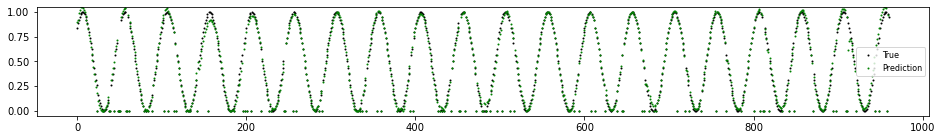

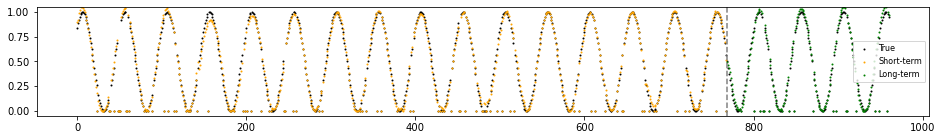

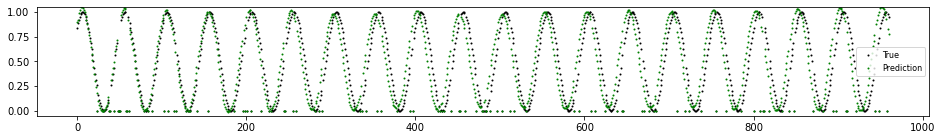

In [66]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training, traintestcontrol[:,:,:nfeature]])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training, np.reshape(control[initialwindow:, 0,:nfeature], (1, -1, nfeature))])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training, np.reshape(control[:, 0,:nfeature], (1, -1, nfeature))])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [39]:
model_long.save_weights("saved_weights/test1_ckpt")
model_long.save('saved_model/test1_model')

(1, 471, 2)
(1, 471, 1)
